# Iris Classification using Machine Learning

## Importing the libraries

Let us have a look at each of the libraries and what they do:
 
- **Pandas** is used for data manipulation and analysis. In particular, it offers data structures and operations for manipulating numerical tables and time series.

- **Numpy** is used for scientific computing and working with arrays. It also has functions for working in domain of linear algebra, fourier transform, and matrices.

- **Matplotlib** is a plotting library. It provides classes and functions for plotting data.

- \**Seaborn** is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

- **Plotly** is an interactive, open-source, and browser-based graphing library for Python. Built on top of plotly.js, plotly.py is a high-level, declarative charting library. It includes support for numpy, pandas, and plotly Express.

- **Cufflinks** is another library that connects the Pandas data frame with Plotly enabling users to create visualizations directly from Pandas.

- **Scikit-learn** is a simple and efficient tools for data mining and data analysis. It provides a range of supervised and unsupervised learning algorithms in Python.

- **Joblib** is used to save sklearn models.

In [153]:
!pip cache purge

Files removed: 0


In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
from sklearn.datasets import load_iris
sns.set_style("white")
cf.go_offline()

## Loading the dataset and creating a dataframe

In [155]:
# Lets first have a look at the load_iris and what it does
print(load_iris.__doc__)

Load and return the iris dataset (classification).

    The iris dataset is a classic and very easy multi-class classification
    dataset.

    =================   ==============
    Classes                          3
    Samples per class               50
    Samples total                  150
    Dimensionality                   4
    Features            real, positive
    =================   ==============

    Read more in the :ref:`User Guide <iris_dataset>`.

    Parameters
    ----------
    return_X_y : bool, default=False
        If True, returns ``(data, target)`` instead of a Bunch object. See
        below for more information about the `data` and `target` object.

        .. versionadded:: 0.18

    as_frame : bool, default=False
        If True, the data is a pandas DataFrame including columns with
        appropriate dtypes (numeric). The target is
        a pandas DataFrame or Series depending on the number of target columns.
        If `return_X_y` is True, then (`dat

In [156]:
data = load_iris()

In [157]:
# The default dataset comes in as dictionaries. Let us have a look at the keys
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [158]:
# Let us have a look at the description of the dataset
print(data["DESCR"])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [159]:
# Let us have a look at the feature names
print(data["feature_names"])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [160]:
# Let us have a look at the target names
print(data['target_names'])

['setosa' 'versicolor' 'virginica']


In [161]:
# Let us have a look at the target
print(data['target'])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [162]:
# Let us have a look at the data
print(data['data'])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

We can see that the data has been created as arrays and what would make them meaningful is to convert them into a dataframe. 
Let us do that now.

## Creating the DataFrame

In [163]:
df = pd.DataFrame(data["data"],columns=data["feature_names"])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [164]:
# Let us create a column for the target_variables
df["target"] = data["target"]
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [165]:
# Let us create a column for the target_names
df["target_names"] = df["target"].map({0:"setosa",1:"versicolor",2:"virginica"})
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [166]:
# Let us have a look at a superficial view of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
 5   target_names       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [167]:
# Let us have a look at the statistical summary of the dataframe
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


## Exploratory Data Analysis

### Univariate Analysis

<Axes: xlabel='target_names', ylabel='count'>

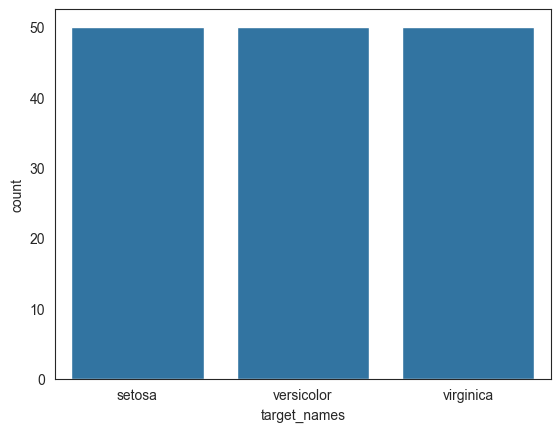

In [168]:
# Let us have a look at the distribution of the target variable
sns.countplot(x = df["target_names"])

In [169]:
"""From the above plot we can infer that the dataset is balanced"""

'From the above plot we can infer that the dataset is balanced'

Text(0.5, 1.0, 'Distribution of Sepal Length')

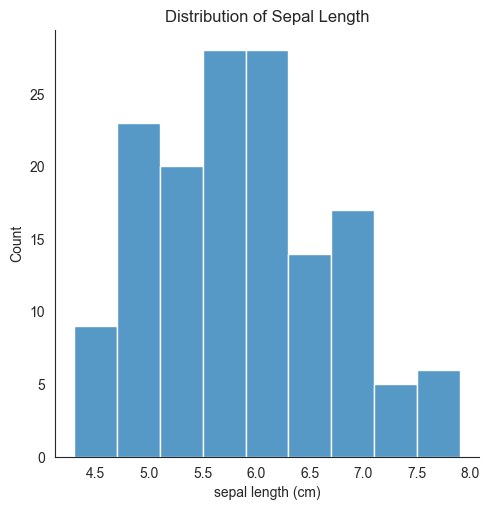

In [170]:
# Let us have a look at the distribution of the sepal length
sns.displot(x = df["sepal length (cm)"])
plt.title("Distribution of Sepal Length")

In [171]:
""" We can infer that the distribution of the sepal length is normal"""

' We can infer that the distribution of the sepal length is normal'

Text(0.5, 1.0, 'Distribution of Sepal Width')

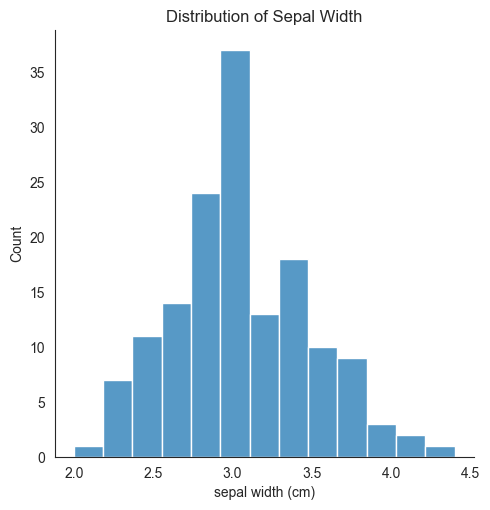

In [172]:
# Let us have a look at the distribution of the sepal width
sns.displot(x = df["sepal width (cm)"])
plt.title("Distribution of Sepal Width")

In [173]:
""" We can infer that the distribution of the sepal width is kinda normal"""

' We can infer that the distribution of the sepal width is kinda normal'

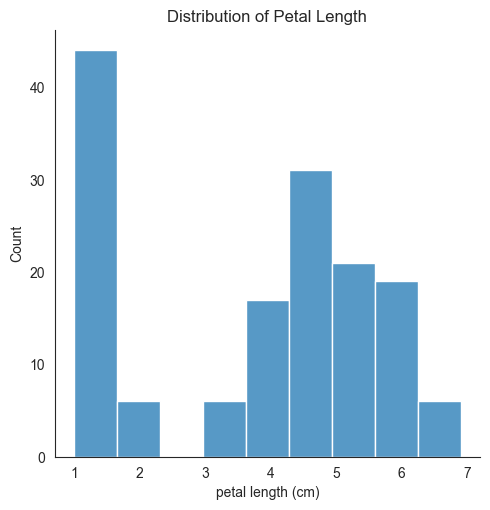

In [174]:
# Let us have a look at the distribution of the petal length
sns.displot(x = df["petal length (cm)"])
plt.title("Distribution of Petal Length")
plt.show()

In [175]:
"""We can infer that the distribution of the petal length is bimodal and there is a peak at 1.5 and a gap between 2 and 3"""

'We can infer that the distribution of the petal length is bimodal and there is a peak at 1.5 and a gap between 2 and 3'

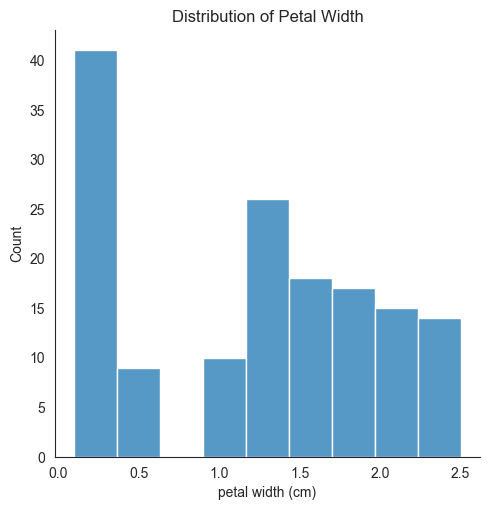

In [176]:
# Let us have a look at the distribution of the petal width
sns.displot(x = df["petal width (cm)"])
plt.title("Distribution of Petal Width")
plt.show()

In [177]:
"""We can infer that the distribution of the petal width is bimodal and there is a peak at 0.25 and a gap between 0.5 and 1"""

'We can infer that the distribution of the petal width is bimodal and there is a peak at 0.25 and a gap between 0.5 and 1'

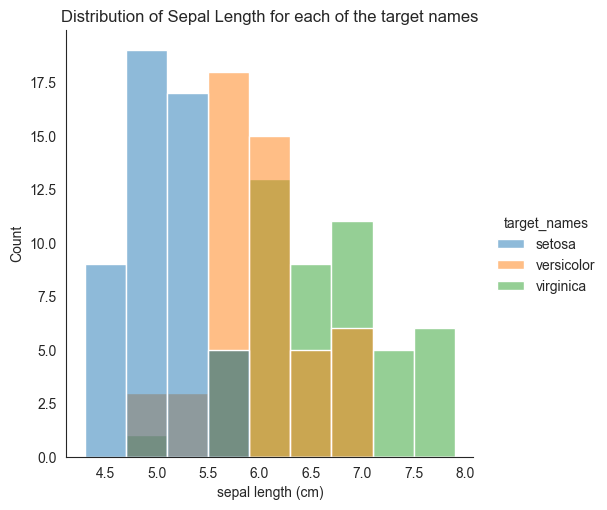

In [178]:
# Let us have a look at the distribution of the sepal length for each of the target names
sns.displot(x = df["sepal length (cm)"],hue=df["target_names"])
plt.title("Distribution of Sepal Length for each of the target names")
plt.show()

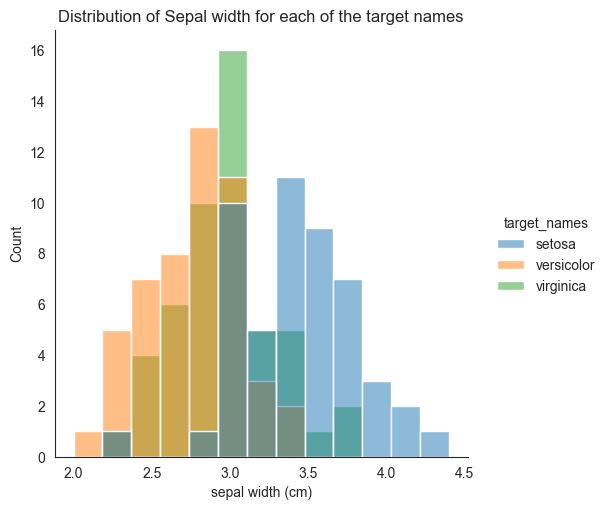

In [179]:
# Plotting the distribution of the sepal width for each of the target names
sns.displot(x=df["sepal width (cm)"],hue=df['target_names'])
plt.title("Distribution of Sepal width for each of the target names")
plt.show()

Text(0.5, 1.0, 'Distribution of Petal Length for each of the target names')

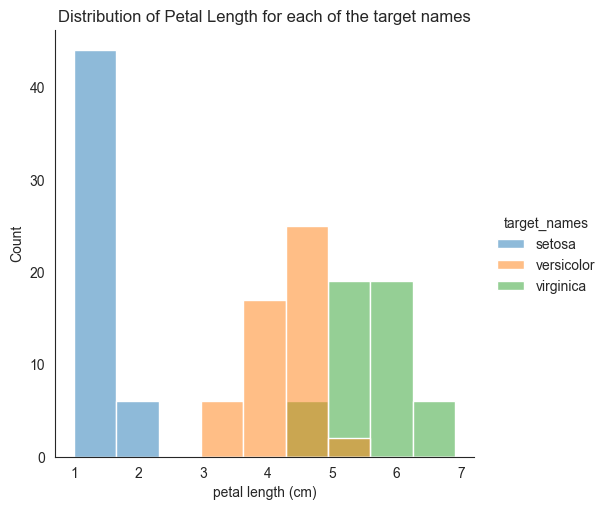

In [180]:
# Plotting the distribution for the Petal length for each of the target names
sns.displot(x = df["petal length (cm)"],hue=df['target_names'])
plt.title("Distribution of Petal Length for each of the target names")

Text(0.5, 1.0, 'Distribution of Petal Width for each of the target names')

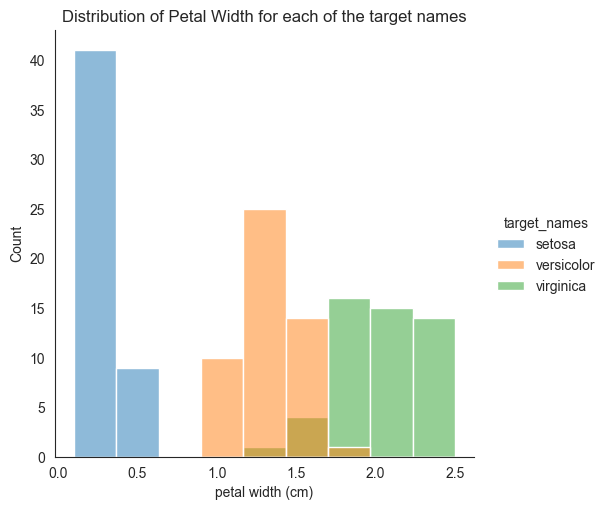

In [181]:
# Plotting the distribution between Petal width and the target name
sns.displot(x=df['petal width (cm)'],hue=df["target_names"])
plt.title("Distribution of Petal Width for each of the target names")

### Multivariate Analysis

In [182]:
"""Lets plot the relationship between the features and the target names """

'Lets plot the relationship between the features and the target names '

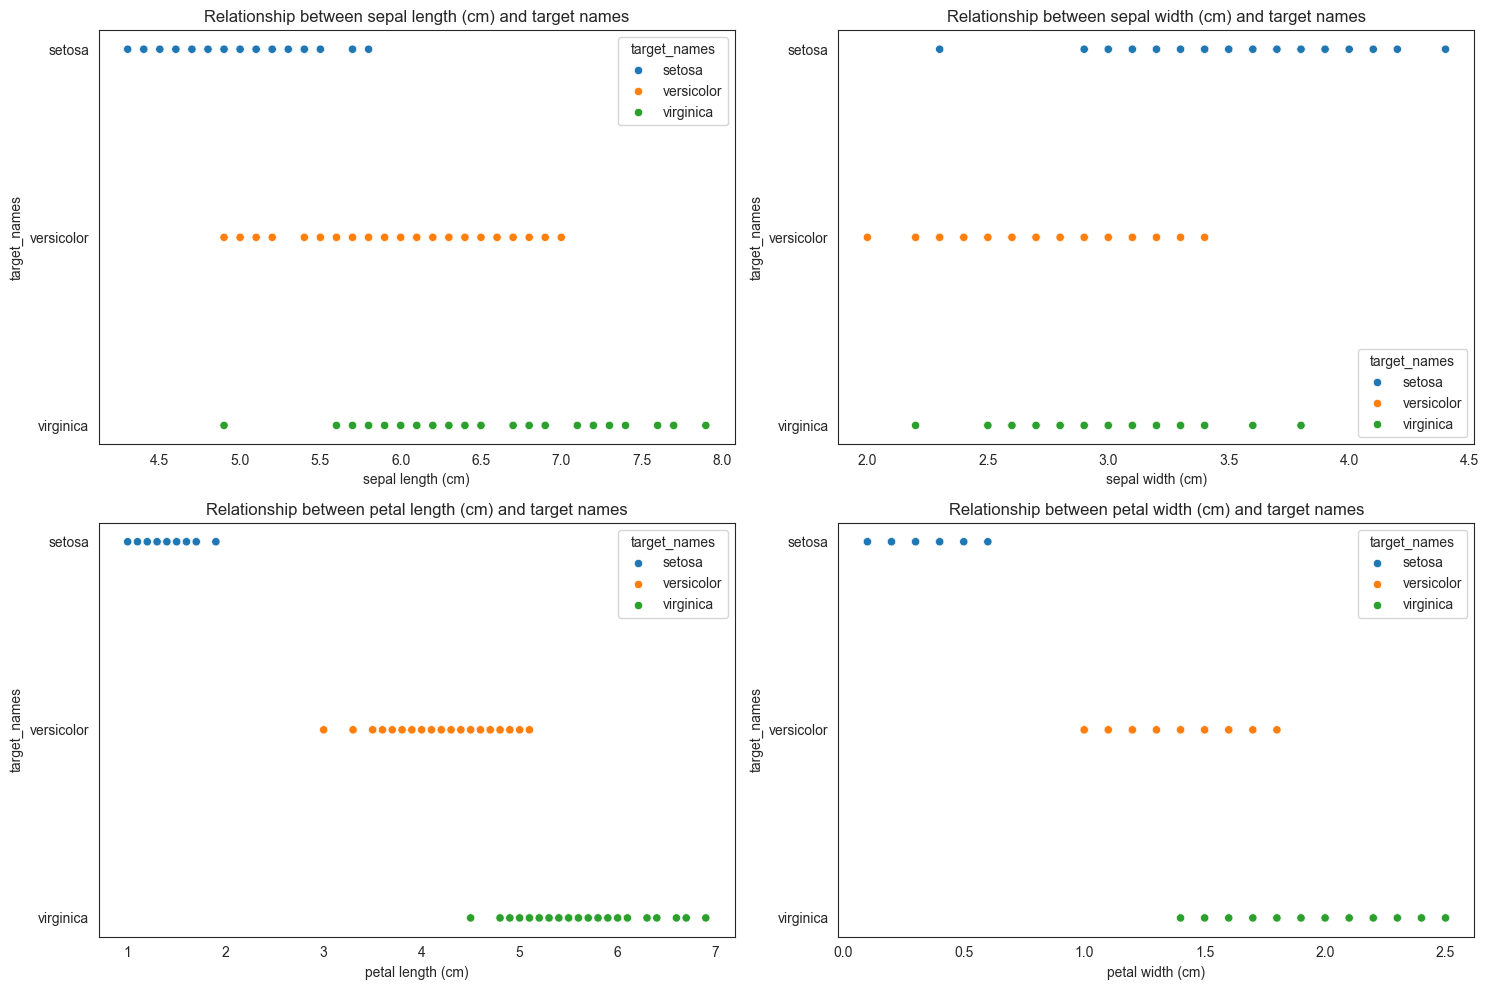

In [183]:
fig = plt.figure(figsize=(15,10))  # Create a new figure, adjust the size as needed

# Loop over the range of the number of features (4 in this case)
for i in range(4):
    ax = plt.subplot(2, 2, i+1)  # Create a subplot in the figure
    sns.scatterplot(x=df[df.columns[i]], y=df["target_names"], hue=df["target_names"], ax=ax)
    ax.set_title(f"Relationship between {df.columns[i]} and target names")  # Set the title for the subplot

plt.tight_layout()  # Adjust the layout
plt.show()  # Display the figure

In [184]:
"""From the above plot we can infer that the Setosa Flowers are easily distinguishable based upon their petal length and petal width"""

'From the above plot we can infer that the Setosa Flowers are easily distinguishable based upon their petal length and petal width'

In [185]:
"""But this is not true for the other flowers so we have to dig deeper."""

'But this is not true for the other flowers so we have to dig deeper.'

In [186]:
"""Let us look at the correlation between the features"""

'Let us look at the correlation between the features'

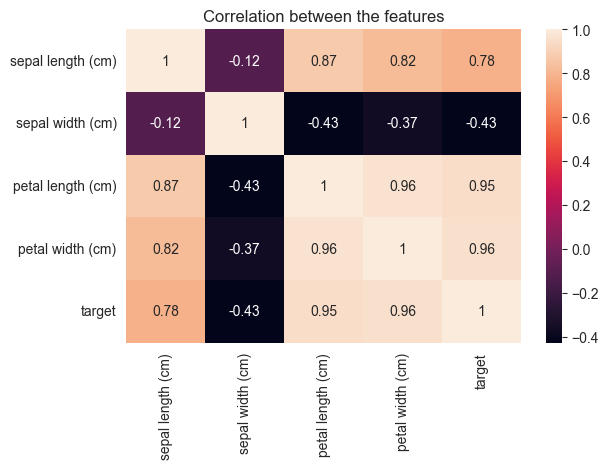

In [187]:
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.title("Correlation between the features")
plt.tight_layout()
plt.show()

In [188]:
"""From the above plot we can infer that the petal length and petal width are highly correlated\nSimilar correlattion exists between the sepal length and petal length.\n We can also infer that there exists a strong correlation between petal wideht and sepal length""" 

'From the above plot we can infer that the petal length and petal width are highly correlated\nSimilar correlattion exists between the sepal length and petal length.\n We can also infer that there exists a strong correlation between petal wideht and sepal length'

In [189]:
"""Let us now look at the relationship between the features and the target variables using a relplot"""

'Let us now look at the relationship between the features and the target variables using a relplot'

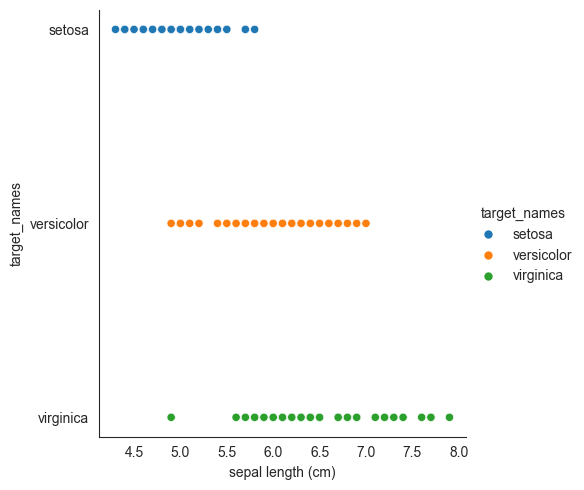

In [190]:
sns.relplot(x="sepal length (cm)",y="target_names",hue="target_names",data=df)

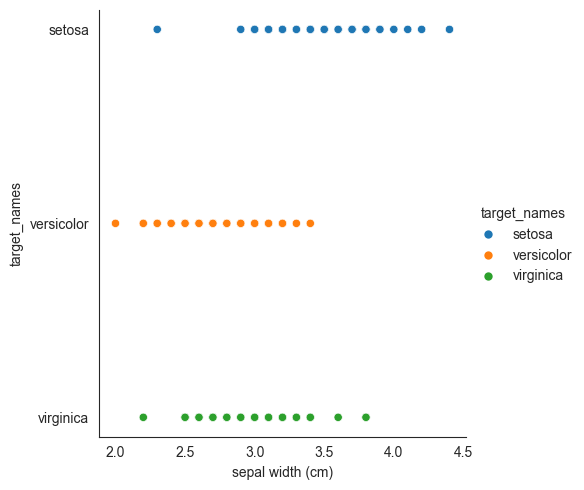

In [191]:
sns.relplot(x="sepal width (cm)",y="target_names",hue="target_names",data=df)

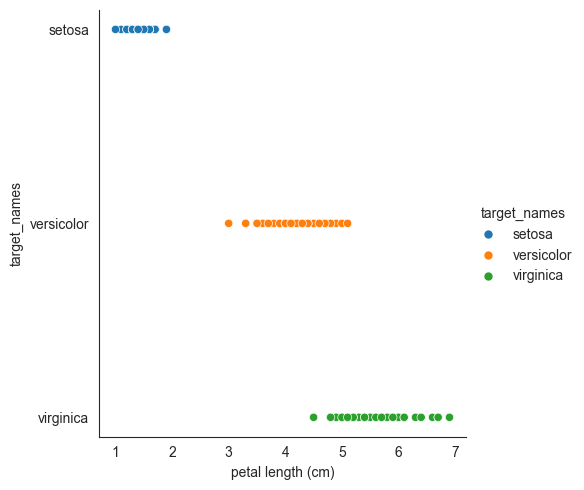

In [192]:
sns.relplot(x="petal length (cm)",y="target_names",hue="target_names",data=df)

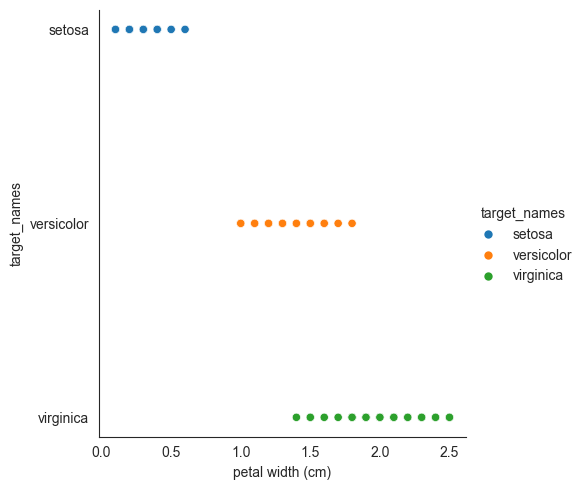

In [193]:
sns.relplot(x="petal width (cm)",y="target_names",hue="target_names",data=df)

In [194]:
"""Let us now look at the relationship between the features"""

'Let us now look at the relationship between the features'

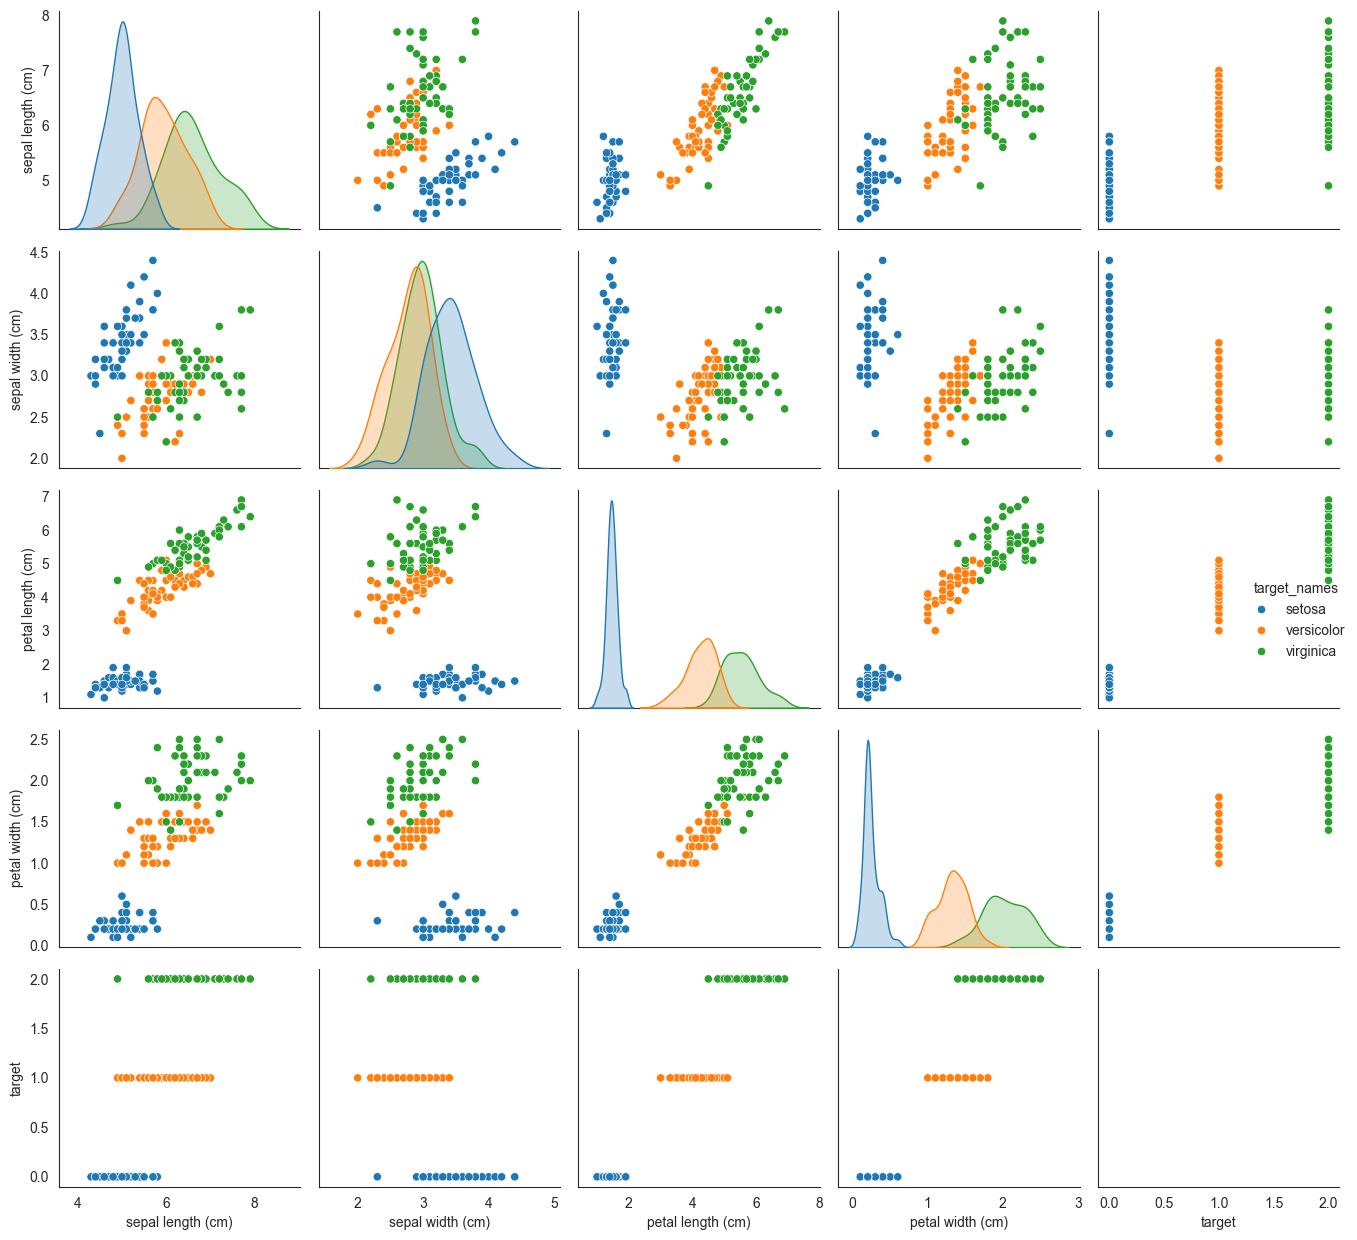

In [195]:
sns.pairplot(df,hue="target_names")
plt.tight_layout()
plt.show()

## Data Preprocessing - Splitting and Baseline Modelling

In [196]:
"""Let us first check for the null values"""

'Let us first check for the null values'

In [197]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
target_names         0
dtype: int64

# Baseline Modelling

What is baseline modelling?
We have 3 species of flowers and we have to classify them. So, we can say that we have 3 classes.
So, if we were to randomly guess the class of the flower, we would be correct 1/3rd of the time.
So the minimum accuracy that we should be aiming for is 0.33 or 33.33%.
This is known as baseline modelling.

**NOTE**: We have 150 data points and we will use 75% of the data for training and 25% of the data for testing.

In [198]:
# Let us first split the data into training and testing data
from sklearn.model_selection import train_test_split

df_train,df_test = train_test_split(df,test_size=0.25)

In [199]:
# Let us have a look at the shape of the training data
df_train.shape

(112, 6)

In [200]:
# Let us have a look at the shape of the testing data
df_test.shape

(38, 6)

<Axes: xlabel='target_names', ylabel='count'>

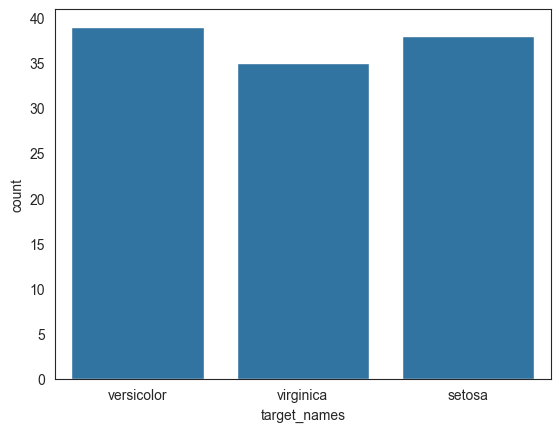

In [201]:
# Let us have a look at the distribution of the target variable in the training data
sns.countplot(x=df_train["target_names"])

<Axes: xlabel='target_names', ylabel='count'>

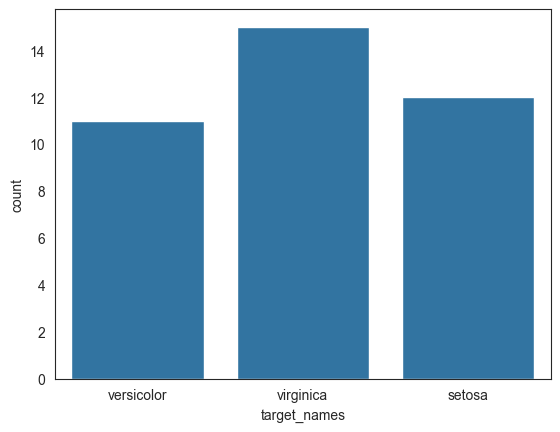

In [202]:
# Let us have a look at the distribution of the target variable in the testing data
sns.countplot(x=df_test["target_names"])


## Manual Modelling

Let us now manually model the data baseed upon the EDA we had performed

In [203]:
"""Splitting the data into train and test data"""

'Splitting the data into train and test data'

In [204]:
X_train = df_train.drop(["target","target_names"],axis=1).values
y_train = df_train["target"].values

In [205]:
X_test = df_test.drop(["target","target_names"],axis=1).values
y_test = df_test["target"].values

In [206]:
"""Let us now create a function based upon the EDA we had performed. From the EDA we can infer that the Setosa Flowers are easily distinguishable based upon their petal length and petal width"""

'Let us now create a function based upon the EDA we had performed. From the EDA we can infer that the Setosa Flowers are easily distinguishable based upon their petal length and petal width'

In [207]:
def single_feature_prediction(petal_length):
    if petal_length < 2.5:
        return 0
    elif petal_length < 4.5:
        return 1
    else:
        return 2

In [208]:
"""Let us now use this function to test upon teh training data"""

'Let us now use this function to test upon teh training data'

In [209]:
manual_single_pred = np.mean(y_test == np.array([single_feature_prediction(i) for i in X_test[:,2]]))
print(f"The accuracy of manual prediction is {manual_single_pred*100:.2f}%")

The accuracy of manual prediction is 86.84%


In [210]:
"""That is a not bad accuracy for a manual prediction :)"""

'That is a not bad accuracy for a manual prediction :)'

## Machine Learning Modelling

### Using Logistic Regression

In [211]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [212]:
model = LogisticRegression(max_iter=200)

In [213]:
# t stands for training and v stands for validation
Xt,Xv,yt,yv = train_test_split(X_train,y_train,test_size=0.25)

In [214]:
Xt

array([[6.1, 2.8, 4. , 1.3],
       [6.4, 2.7, 5.3, 1.9],
       [6.8, 2.8, 4.8, 1.4],
       [5.5, 2.5, 4. , 1.3],
       [4.4, 2.9, 1.4, 0.2],
       [7.3, 2.9, 6.3, 1.8],
       [5.1, 3.5, 1.4, 0.2],
       [6.6, 3. , 4.4, 1.4],
       [5.6, 3. , 4.1, 1.3],
       [6.1, 2.8, 4.7, 1.2],
       [5.8, 2.7, 3.9, 1.2],
       [5.8, 2.7, 5.1, 1.9],
       [6.9, 3.1, 5.1, 2.3],
       [4.9, 3.1, 1.5, 0.2],
       [5.3, 3.7, 1.5, 0.2],
       [5.6, 2.7, 4.2, 1.3],
       [6.2, 2.8, 4.8, 1.8],
       [4.9, 3. , 1.4, 0.2],
       [6.6, 2.9, 4.6, 1.3],
       [5.7, 2.6, 3.5, 1. ],
       [6.3, 2.8, 5.1, 1.5],
       [7.9, 3.8, 6.4, 2. ],
       [5.7, 3. , 4.2, 1.2],
       [5.2, 3.4, 1.4, 0.2],
       [6.7, 3. , 5.2, 2.3],
       [5.7, 2.8, 4.5, 1.3],
       [6.7, 3.1, 4.7, 1.5],
       [6.2, 2.9, 4.3, 1.3],
       [7.7, 3.8, 6.7, 2.2],
       [6.1, 3. , 4.6, 1.4],
       [5.6, 2.9, 3.6, 1.3],
       [5.1, 3.8, 1.6, 0.2],
       [5. , 2. , 3.5, 1. ],
       [5. , 3.4, 1.6, 0.4],
       [6.5, 3

In [215]:
model.fit(Xt,yt)

LogisticRegression(max_iter=200)

In [216]:
y_pred = model.predict(Xv)

In [217]:
np.mean(y_pred == yv) * 100

96.42857142857143

In [218]:
"""The accuracy of the model is about 96%, lets see if we can improve it"""

'The accuracy of the model is about 96%, lets see if we can improve it'

### Using Cross validation to improve the accuracy

In [219]:
from sklearn.model_selection import cross_val_predict,cross_val_score

In [220]:
model = LogisticRegression(max_iter=200)

In [221]:
accuracy = cross_val_score(model,X_train,y_train,cv=12,scoring="accuracy")

In [222]:
np.mean(accuracy) * 100

95.64814814814815

In [223]:
"""The accuracy of the model has worsened to 95%, but its okay"""

'The accuracy of the model has worsened to 95%, but its okay'

In [224]:
cross_val_predictions = cross_val_predict(model,X_train,y_train,cv=36)

/Users/kausik/.local/share/virtualenvs/OIBSIP-D-Qe3RJc/lib/python3.11/site-packages/sklearn/model_selection/_split.py:737: UserWarning:

The least populated class in y has only 35 members, which is less than n_splits=36.



In [225]:
np.mean(cross_val_predictions == y_train) * 100

95.53571428571429

In [226]:
predicted_correctly_mask = cross_val_predictions == y_train
predicted_correctly_mask

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True])

In [227]:
df_cross_val_pred_correct = X_train[predicted_correctly_mask]
df_cross_val_pred_correct

array([[5.7, 2.8, 4.1, 1.3],
       [6.3, 2.5, 4.9, 1.5],
       [7.2, 3. , 5.8, 1.6],
       [5.9, 3. , 5.1, 1.8],
       [6.1, 3. , 4.9, 1.8],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.4, 1.5, 0.2],
       [4.5, 2.3, 1.3, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [6.9, 3.1, 5.1, 2.3],
       [5.7, 4.4, 1.5, 0.4],
       [6.3, 2.5, 5. , 1.9],
       [5.1, 3.5, 1.4, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [7. , 3.2, 4.7, 1.4],
       [5.5, 2.4, 3.7, 1. ],
       [7.1, 3. , 5.9, 2.1],
       [6.7, 3.1, 4.4, 1.4],
       [6.3, 2.9, 5.6, 1.8],
       [6.2, 3.4, 5.4, 2.3],
       [5.7, 2.8, 4.5, 1.3],
       [7.3, 2.9, 6.3, 1.8],
       [5.5, 2.3, 4. , 1.3],
       [6.4, 2.7, 5.3, 1.9],
       [5.6, 2.8, 4.9, 2. ],
       [5.2, 2.7, 3.9, 1.4],
       [6.9, 3.1, 5.4, 2.1],
       [5.6, 2.7, 4.2, 1.3],
       [5.6, 3. , 4.1, 1.3],
       [4.8, 3. , 1.4, 0.1],
       [4.9, 3. , 1.4, 0.2],
       [6.4, 3.2, 5.3, 2.3],
       [6.3, 2.3, 4.4, 1.3],
       [6.4, 2.9, 4.3, 1.3],
       [5.2, 3

In [228]:
df_cross_val_pred_wrong = X_train[~predicted_correctly_mask]
df_cross_val_pred_wrong

array([[6.3, 2.8, 5.1, 1.5],
       [6.2, 2.8, 4.8, 1.8],
       [5.9, 3.2, 4.8, 1.8],
       [6.7, 3. , 5. , 1.7],
       [6. , 2.2, 5. , 1.5]])

In [229]:
df_prediction = df_train.copy()

In [230]:
df_prediction["predicted"] = predicted_correctly_mask
df_prediction

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names,predicted
99,5.7,2.8,4.1,1.3,1,versicolor,True
72,6.3,2.5,4.9,1.5,1,versicolor,True
129,7.2,3.0,5.8,1.6,2,virginica,True
149,5.9,3.0,5.1,1.8,2,virginica,True
127,6.1,3.0,4.9,1.8,2,virginica,True
...,...,...,...,...,...,...,...
42,4.4,3.2,1.3,0.2,0,setosa,True
86,6.7,3.1,4.7,1.5,1,versicolor,True
97,6.2,2.9,4.3,1.3,1,versicolor,True
95,5.7,3.0,4.2,1.2,1,versicolor,True


In [231]:
df_prediction["prediction"] = cross_val_predictions
df_prediction["prediction_names"] = df_prediction["prediction"].map({0:"setosa",1:"versicolor",2:"virginica"})
df_prediction

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names,predicted,prediction,prediction_names
99,5.7,2.8,4.1,1.3,1,versicolor,True,1,versicolor
72,6.3,2.5,4.9,1.5,1,versicolor,True,1,versicolor
129,7.2,3.0,5.8,1.6,2,virginica,True,2,virginica
149,5.9,3.0,5.1,1.8,2,virginica,True,2,virginica
127,6.1,3.0,4.9,1.8,2,virginica,True,2,virginica
...,...,...,...,...,...,...,...,...,...
42,4.4,3.2,1.3,0.2,0,setosa,True,0,setosa
86,6.7,3.1,4.7,1.5,1,versicolor,True,1,versicolor
97,6.2,2.9,4.3,1.3,1,versicolor,True,1,versicolor
95,5.7,3.0,4.2,1.2,1,versicolor,True,1,versicolor


# Where are we making mistakes??

Let us plot the data where we are making mistakes

In [232]:
def plot_mistakes(df_prediction, feature1, feature2):
    fig, axs = plt.subplots(2, 2, figsize=(10, 10))
    axs = axs.flatten()
    sns.scatterplot(x=feature1, y=feature2, hue="target_names", data=df_prediction, ax=axs[0])
    sns.scatterplot(x=feature1, y=feature2, hue="prediction_names", data=df_prediction, ax=axs[1])
    sns.scatterplot(x=feature1, y=feature2, hue="predicted", data=df_prediction, ax=axs[2])
    axs[3].set_visible(False)
    plt.tight_layout()
    plt.show()

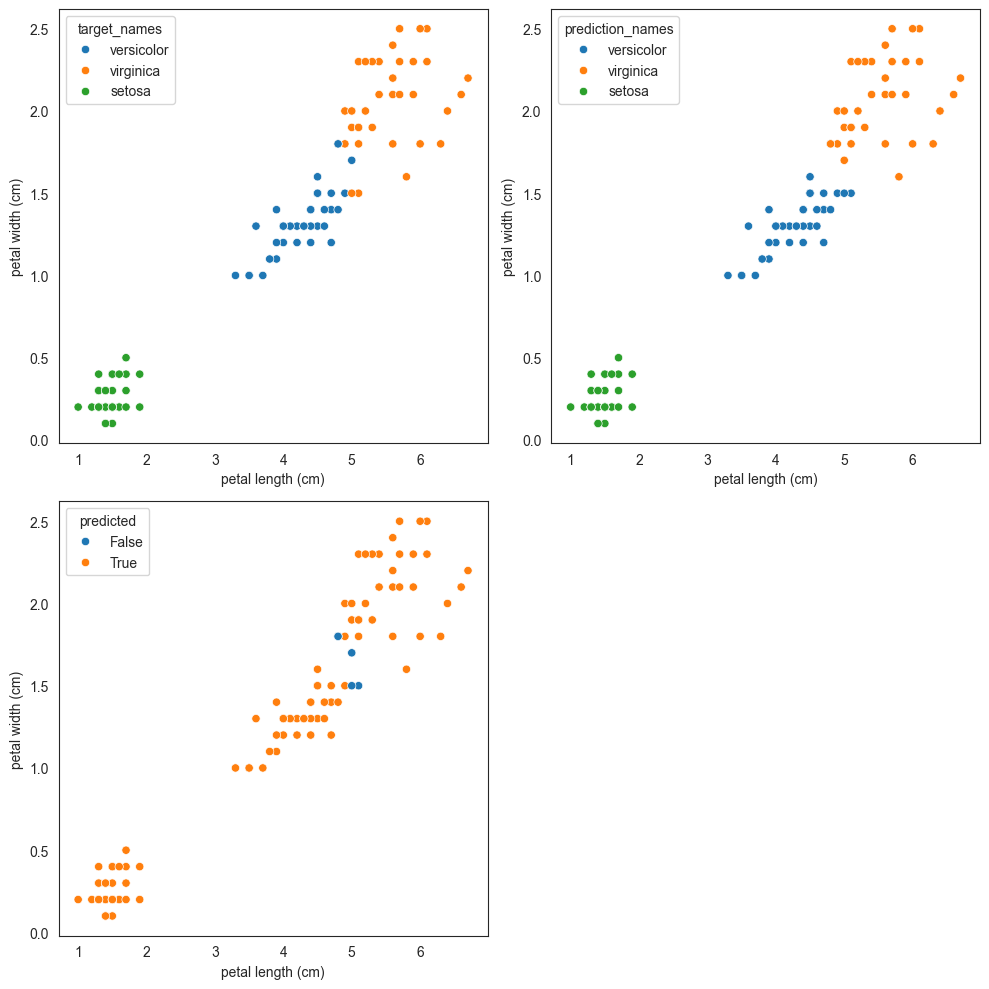

In [233]:
plot_mistakes(df_prediction,"petal length (cm)","petal width (cm)")

# Model Tuning

What is model tuning?

Model tuning is the process where we adjust the model paramters or the so called "hyperparameters" to improve the performance of the model.

In [234]:
"""The C parameter in the Logistic Regression model is the inverse of the regularization strength. Regularization is applying a penalty to 
increasing the magnitude of parameter values in order to reduce overfitting. Smaller values of C specify stronger regularization. Let us try to tune the C parameter"""
"""
Simply put if C is small the model does not memorize the data and overfit, but if C is large the model memorizes the data and overfits.
"""

model = LogisticRegression(max_iter=200,C=0.1)
tuning_cross_val_score = cross_val_score(model,X_train,y_train,cv=5,scoring="accuracy")
print(f"The accuracy of the model is {np.mean(tuning_cross_val_score)*100:.2f}%")

The accuracy of the model is 95.53%


In [235]:
"""The accuracy seems to have a hit, let us try to improve it"""
for i in np.linspace(0.1,5,10):
    model = LogisticRegression(max_iter=200,C=i)
    tuning_cross_val_score = cross_val_score(model,X_train,y_train,cv=5,scoring="accuracy")
    print(f"The accuracy of the model is {np.mean(tuning_cross_val_score)*100:.2f}% for C = {i}")

The accuracy of the model is 95.53% for C = 0.1
The accuracy of the model is 96.44% for C = 0.6444444444444445
The accuracy of the model is 96.44% for C = 1.188888888888889
The accuracy of the model is 96.44% for C = 1.7333333333333336
The accuracy of the model is 96.44% for C = 2.277777777777778
The accuracy of the model is 96.44% for C = 2.8222222222222224
The accuracy of the model is 96.44% for C = 3.366666666666667
The accuracy of the model is 97.35% for C = 3.911111111111112
The accuracy of the model is 97.35% for C = 4.455555555555556
The accuracy of the model is 97.35% for C = 5.0


In [236]:
"""Let us try for bigger C values"""
def find_best_C(start,stop,step):
    max_accuracy = 0
    best_C = 0    
    for i in np.linspace(start,stop,step):
        model = LogisticRegression(max_iter=2000, C=i)
        tuning_cross_val_score = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")
        accuracy = np.mean(tuning_cross_val_score) * 100
        if accuracy > max_accuracy:
            max_accuracy = accuracy
            best_C = i
    return f"The best accuracy is {max_accuracy:.2f}% for C = {best_C:.2f}"
    
find_best_C(0.1, 100, 1000)

'The best accuracy is 97.35% for C = 3.40'

# Using GridSearchCV to find the best parameters

In [237]:
from sklearn.model_selection import GridSearchCV

In [238]:
model = LogisticRegression(max_iter=200)

In [239]:
param_grid = {"C":np.linspace(0.1,100,1000)}

In [240]:
grid = GridSearchCV(model,param_grid,cv=5,scoring="accuracy")


In [241]:
grid.fit(X_train,y_train)

/Users/kausik/.local/share/virtualenvs/OIBSIP-D-Qe3RJc/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/kausik/.local/share/virtualenvs/OIBSIP-D-Qe3RJc/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=200),
             param_grid={'C': array([  0.1,   0.2,   0.3,   0.4,   0.5,   0.6,   0.7,   0.8,   0.9,
         1. ,   1.1,   1.2,   1.3,   1.4,   1.5,   1.6,   1.7,   1.8,
         1.9,   2. ,   2.1,   2.2,   2.3,   2.4,   2.5,   2.6,   2.7,
         2.8,   2.9,   3. ,   3.1,   3.2,   3.3,   3.4,   3.5,   3.6,
         3.7,   3.8,   3.9,   4. ,   4.1,   4.2,   4.3,   4.4,   4.5,
         4.6,   4.7,   4.8,   4.9,   5. ,   5.1,   5.2,   5.3,   5.4,
         5.5,   5.6,   5.7,   5.8,   5.9,   6. ,   6.1,   6.2,   6.3,
         6.4,   6.5,   6.6,   6.7,   6.8,...
        92.8,  92.9,  93. ,  93.1,  93.2,  93.3,  93.4,  93.5,  93.6,
        93.7,  93.8,  93.9,  94. ,  94.1,  94.2,  94.3,  94.4,  94.5,
        94.6,  94.7,  94.8,  94.9,  95. ,  95.1,  95.2,  95.3,  95.4,
        95.5,  95.6,  95.7,  95.8,  95.9,  96. ,  96.1,  96.2,  96.3,
        96.4,  96.5,  96.6,  96.7,  96.8,  96.9,  97. ,  97.1,  97.2,
        97.3,  97.4,  97.5,  97.6,  97.7,  97.8,  97.9,  98. ,  98.1,
        98.2,  98.3,  98.4,  98.5,  98.6,  98.7,  98.8,  98.9,  99. ,
        99.1,  99.2,  99.3,  99.4,  99.5,  99.6,  99.7,  99.8,  99.9,
       100. ])},
             scoring='accuracy')

In [242]:
grid.best_params_

{'C': 3.4000000000000004}

In [243]:
grid.best_score_

0.9735177865612649

In [ ]:
"""Turns out that the best accuracy LogisticRegression can give is 95.53% with a C = 1.3"""

# Final Model

In [ ]:
model = LogisticRegression(max_iter=200,C=1.3)

In [ ]:
model.fit(X_train,y_train)

In [ ]:
prediction = model.predict(X_test)

In [ ]:
np.mean(prediction == y_test) * 100

In [ ]:
"""The model seems to have a pretty good accuracy of about 97%"""


In [ ]:
"""Let us now have a look at the confusion matrix"""


In [ ]:
from sklearn.metrics import confusion_matrix


In [ ]:
sns.heatmap(confusion_matrix(y_test,prediction),annot=True)
plt.title("Confusion Matrix")
# labelling the axes
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [145]:
from joblib import dump

In [146]:
dump(model,"iris_model.joblib")

['iris_model.joblib']